EMSE 6992 Final Project

Fall 2018

Google Play Store Apps 

Xiao Han

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
print(len(df))

10841


In [5]:
#Drop missing data
df.dropna(how='any', inplace=True)
print(df.shape)

(9360, 13)


In [6]:
#Data pre-processing Installs
df.Installs = df.Installs.apply(lambda x: x.replace(',', ''))
df.Installs = df.Installs.apply(lambda x: x.replace('+', ''))
df.Installs = df.Installs.apply(lambda x: float(x))
#print(set(df.Installs))#remove , and + in installs

In [7]:
#Data pre-processing Size
df.Size.replace('Varies with device', np.nan, inplace = True)
df.Size = df.Size.apply(lambda x: str(x).replace('M',''))
df.Size = df.Size.apply(lambda x: str(x).replace(',',''))
df.Size = df.Size.apply(lambda x: float(str(x).replace('k',''))/1000)
#print(set(df.Size))#replace 'Varies with device with nan', remove M and k and convert k to M

In [8]:
#Data pre-processing Price
df.Price = df.Price.apply(lambda x: x.replace('$',''))
df.Price = df.Price.apply(lambda x: float(x))
#print(set(df.Price))#remove dollar sign

In [9]:
#Data pre-processing for other columns
df.Reviews = df.Reviews.apply(lambda x: int(x))
df.Rating = df.Rating.apply(lambda x: float(x))

Count categories

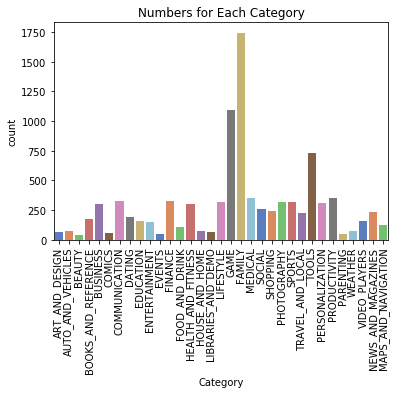

In [10]:
ax = sns.countplot(x='Category', data=df, palette='muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Numbers for Each Category')
plt.show()

Other good way to show the count for categories

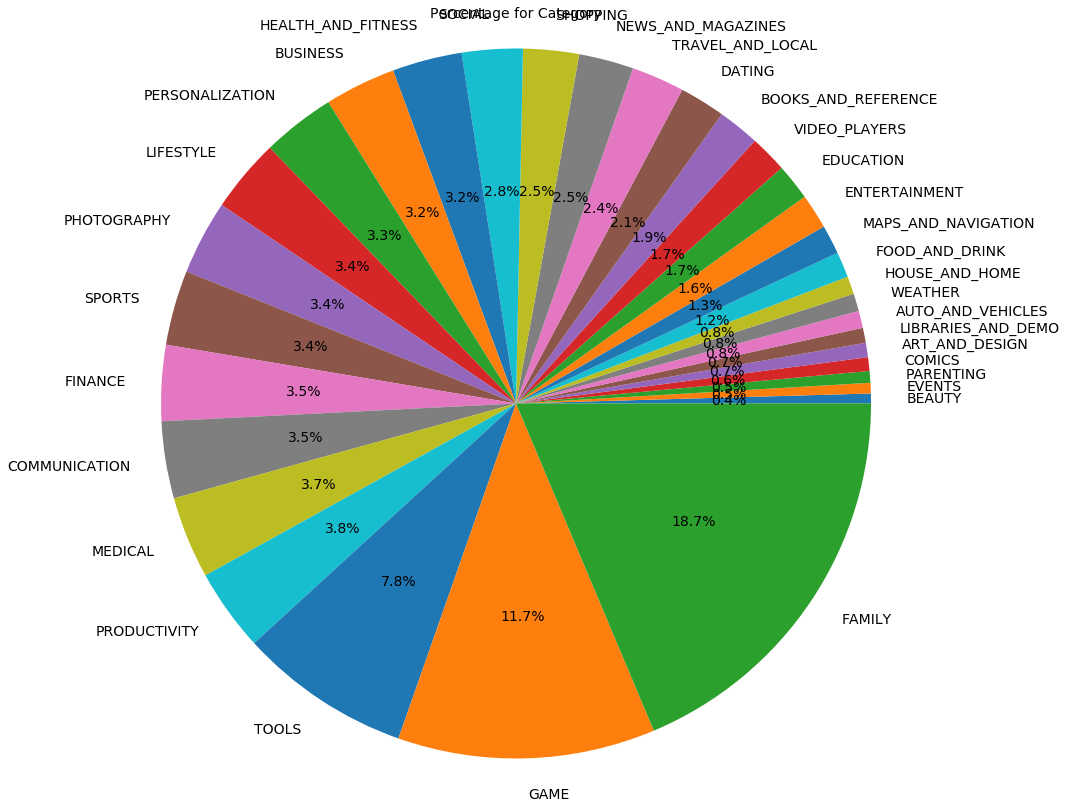

In [11]:
#%matplotlib notebook
cnt = df.Category.value_counts().sort_values(ascending=True)
labels = cnt.index
sizes = cnt.values
fig = plt.figure(figsize=(14,14)) 
plt.pie(sizes, labels=labels,autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Percentage for Category',size = 14)
plt.axis('equal')
plt.show()

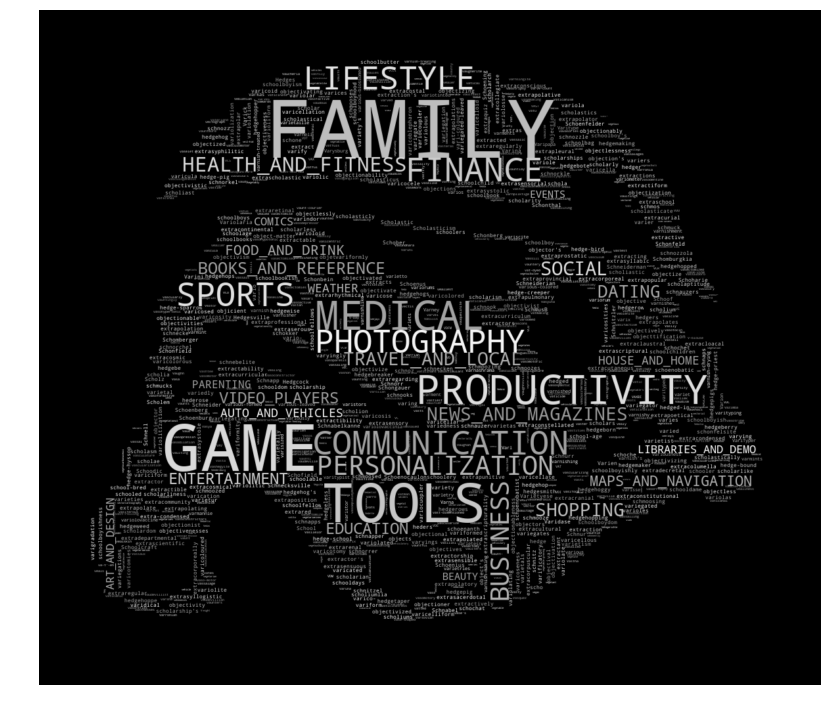

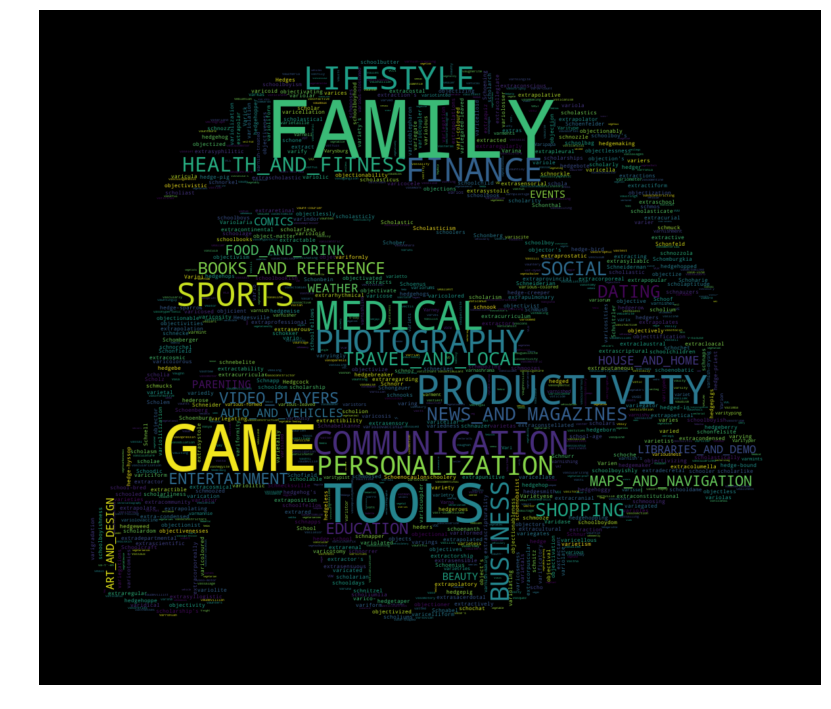

In [12]:
#%matplotlib notebook
#https://github.com/amueller/word_cloud
#https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = open(path.join(d, '1.txt')).read()

open_file = open('2.txt', 'r')
words_list =[]
contents = open_file.readlines()
for i in range(len(contents)):
    words_list.append(contents[i].strip('\n'))

for i in words_list:
    if i in cnt.keys():
        cnt[i] += 1
    else:
        cnt[i] = 1
    
    

wc = WordCloud(max_words=10000, mask=mask, margin=1,
               random_state=1).generate(text)
wc = WordCloud.fit_words(wc, cnt) 
# store default colored image
default_colors = wc.to_array()
plt.figure(figsize=(14,14))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("a_new_hope.png")
plt.axis("off")
fig = plt.figure(figsize=(14,14))
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

Showing Rating Result

In [13]:
print('Average app rating = ', np.mean(df['Rating']))

Average app rating =  4.191837606837612


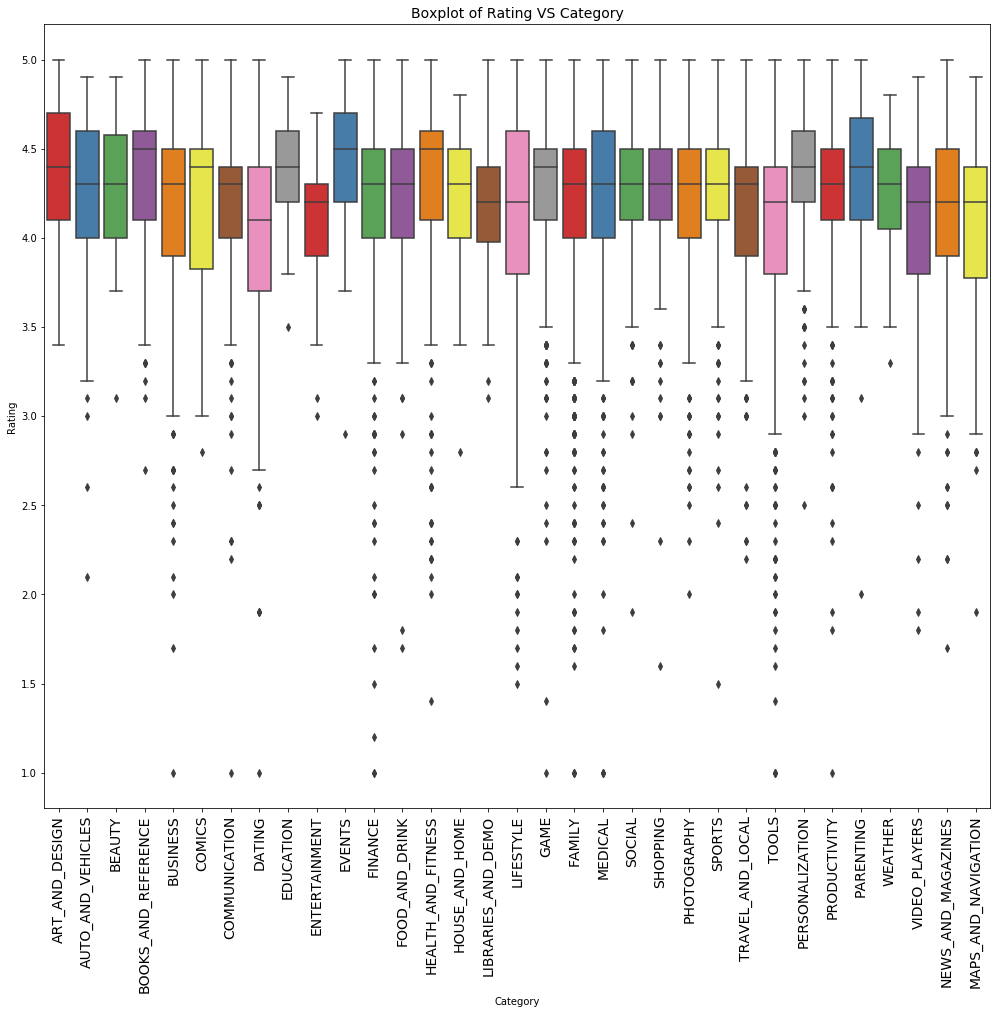

In [14]:
fig = plt.figure(figsize=(14,14)) 
ax = sns.boxplot(x='Category',y='Rating',data=df, palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontdict={'fontsize': '14'})
plt.tight_layout()
plt.title('Boxplot of Rating VS Category',size = 14)
plt.show()

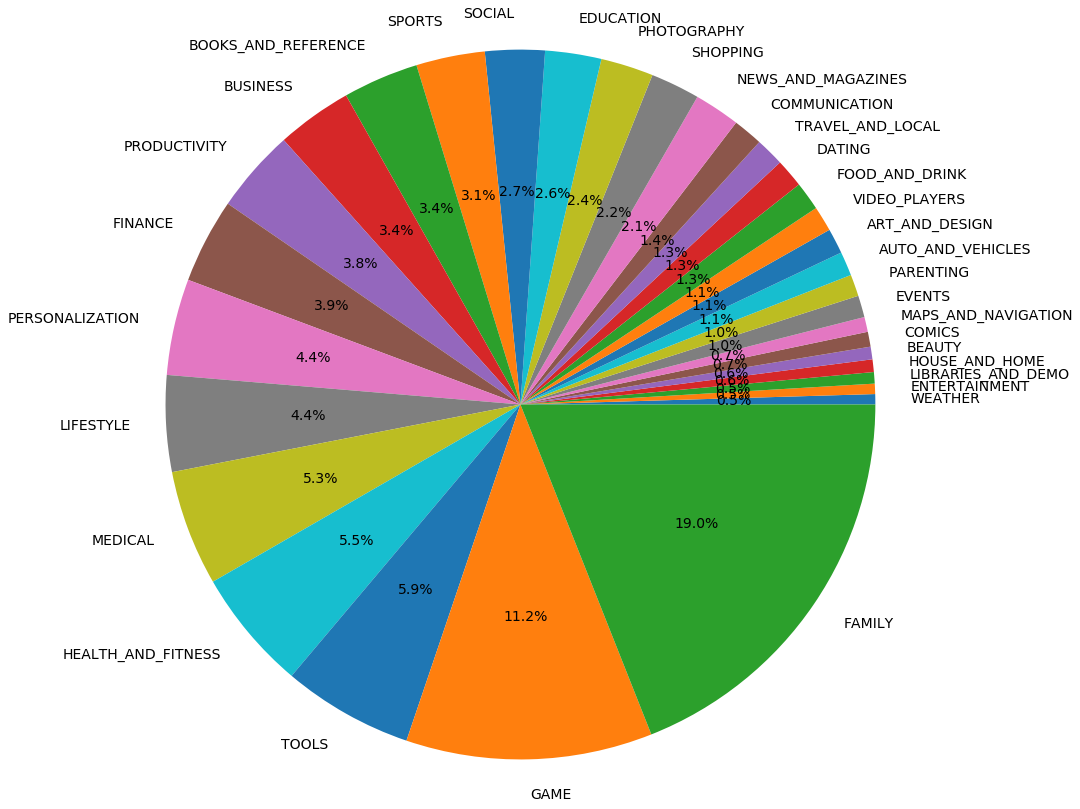

In [15]:
cnt = df.Category[df.Rating>4.5].value_counts().sort_values(ascending=True)
labels = cnt.index
sizes = cnt.values
plt.figure(figsize=(14,14)) 
plt.pie(sizes, labels=labels,autopct='%1.1f%%', textprops={'fontsize': 14})
plt.axis('equal')
plt.show()

The result shows that Prodctivity apps usually have lower rating.

I will focus on Family, Game, Tools, Health_and_fitness, and Medical apps in rest part of project.

Rating VS Installs

Text(0.5,1,'Rating VS Installs')

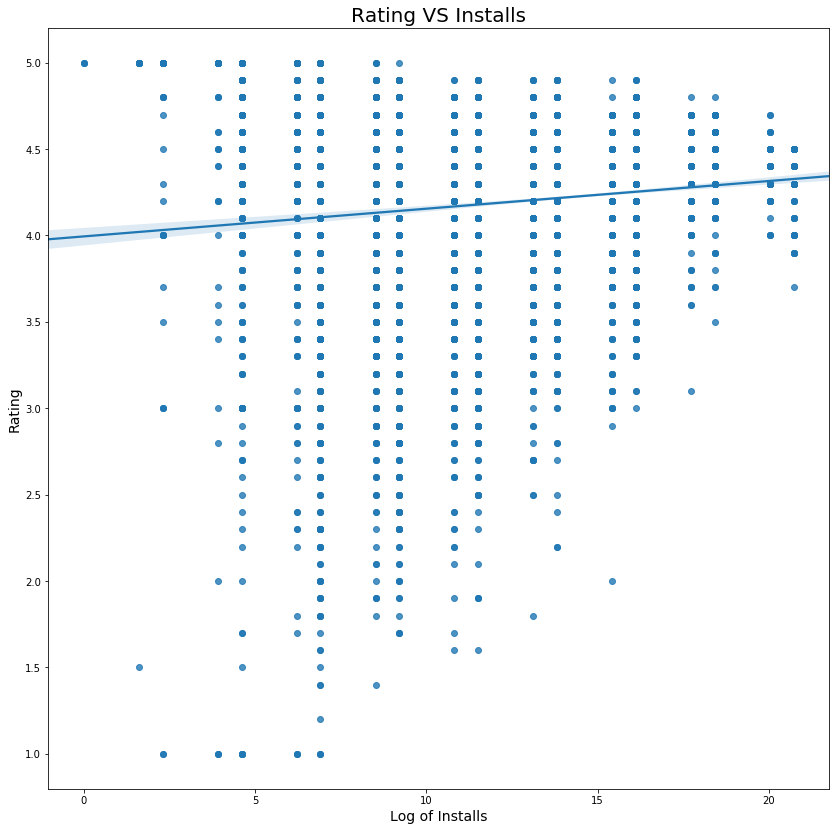

In [16]:
fig = plt.figure(figsize = (14,14))
df['Logins'] = np.log(df.Installs)

ax = sns.regplot(x='Logins', y='Rating',data=df)
ax.set_xlabel('Log of Installs', size = 14)
ax.set_ylabel('Rating', size = 14)
plt.title('Rating VS Installs',size = 20)

Free VS Paid

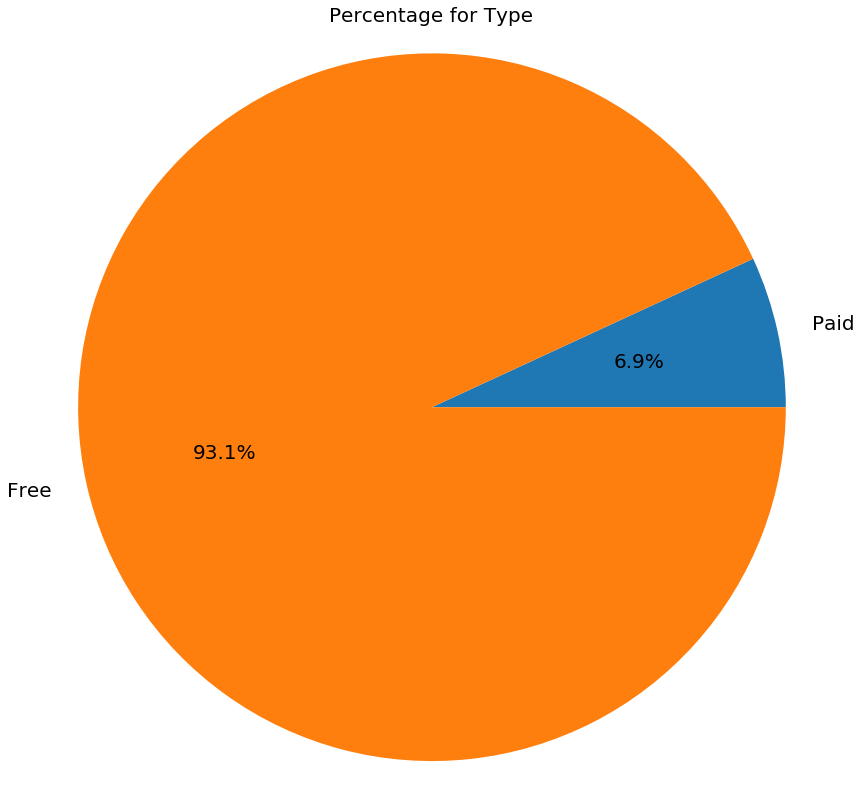

In [17]:
cnt = df.Type.value_counts().sort_values(ascending=True)
labels = cnt.index
sizes = cnt.values
plt.figure(figsize=(14,14)) 
plt.pie(sizes, labels=labels,autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Percentage for Type',size = 20)
plt.axis('equal')
plt.show()

Price

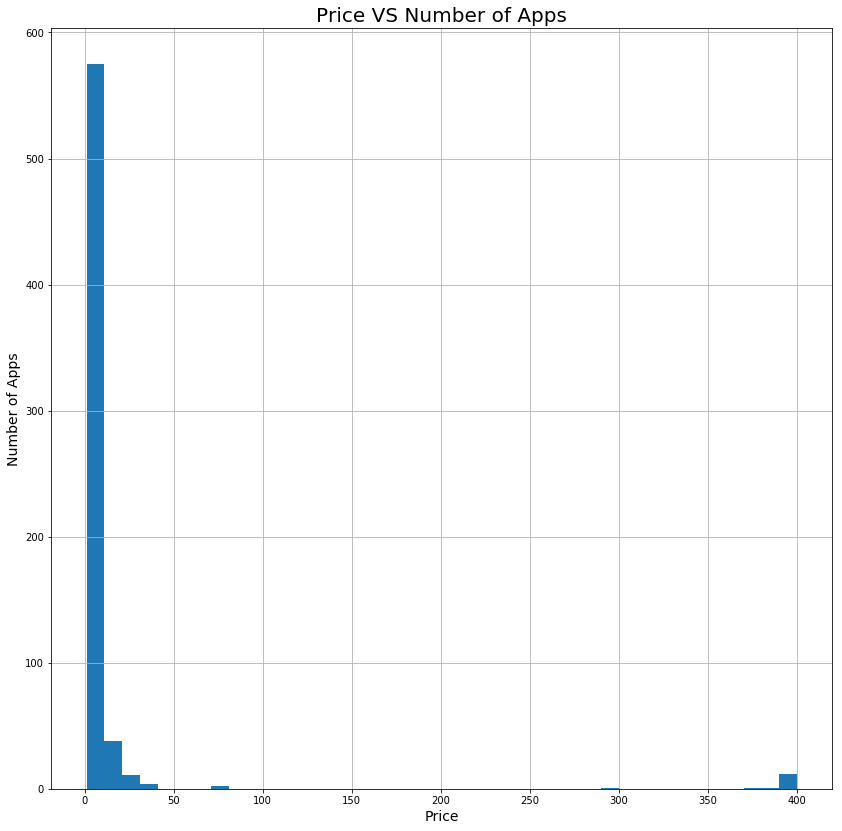

In [18]:
pri = df[df.Price>0]
plt.figure(figsize=(14,14))
plt.hist(pri.Price,bins=40)
plt.grid(True)
plt.xlabel('Price',fontsize=14)
plt.ylabel('Number of Apps',fontsize=14)
plt.title('Price VS Number of Apps',fontsize=20)
plt.show()

The Most Expensive App

In [19]:
ma = df.Price.max()
df[['Category', 'App']][df.Price == ma]

,Category,App
4367,LIFESTYLE,I'm Rich - Trump Edition


Review

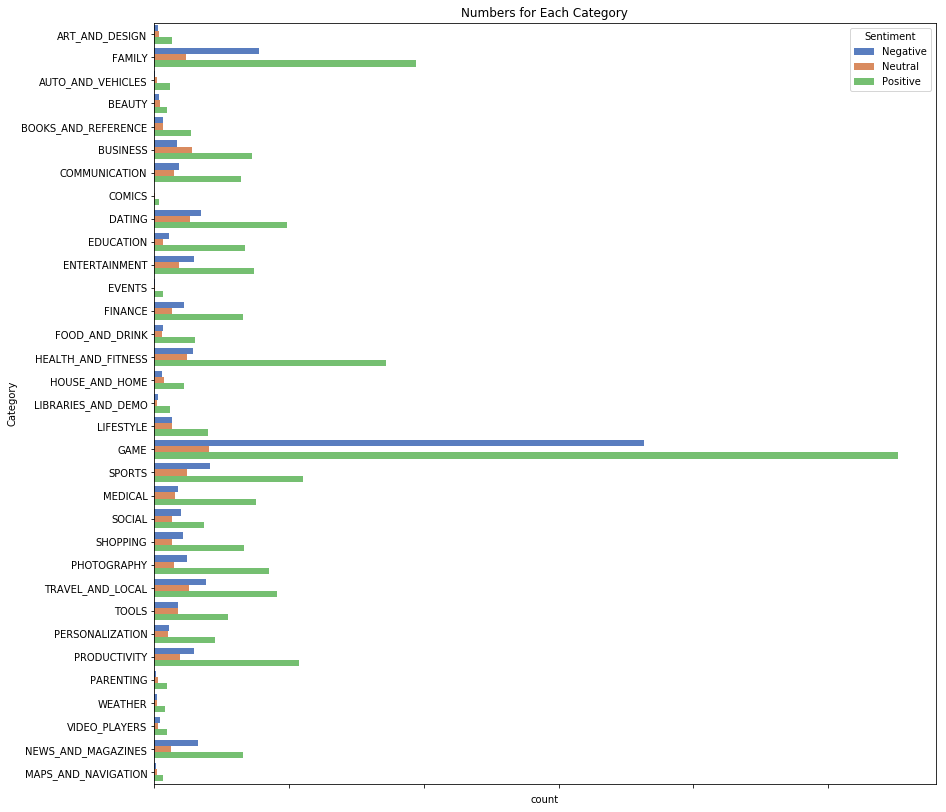

In [20]:
dfr = pd.read_csv('googleplaystore_user_reviews.csv')
mdf = pd.merge(df,dfr, on='App', how='inner')
mdf = mdf.dropna(subset=['Sentiment', 'Translated_Review'])
fig = plt.figure(figsize=(14,14))
plt.tight_layout()
ax = sns.countplot(y='Category',hue='Sentiment', data=mdf, palette='muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Numbers for Each Category')
plt.show()

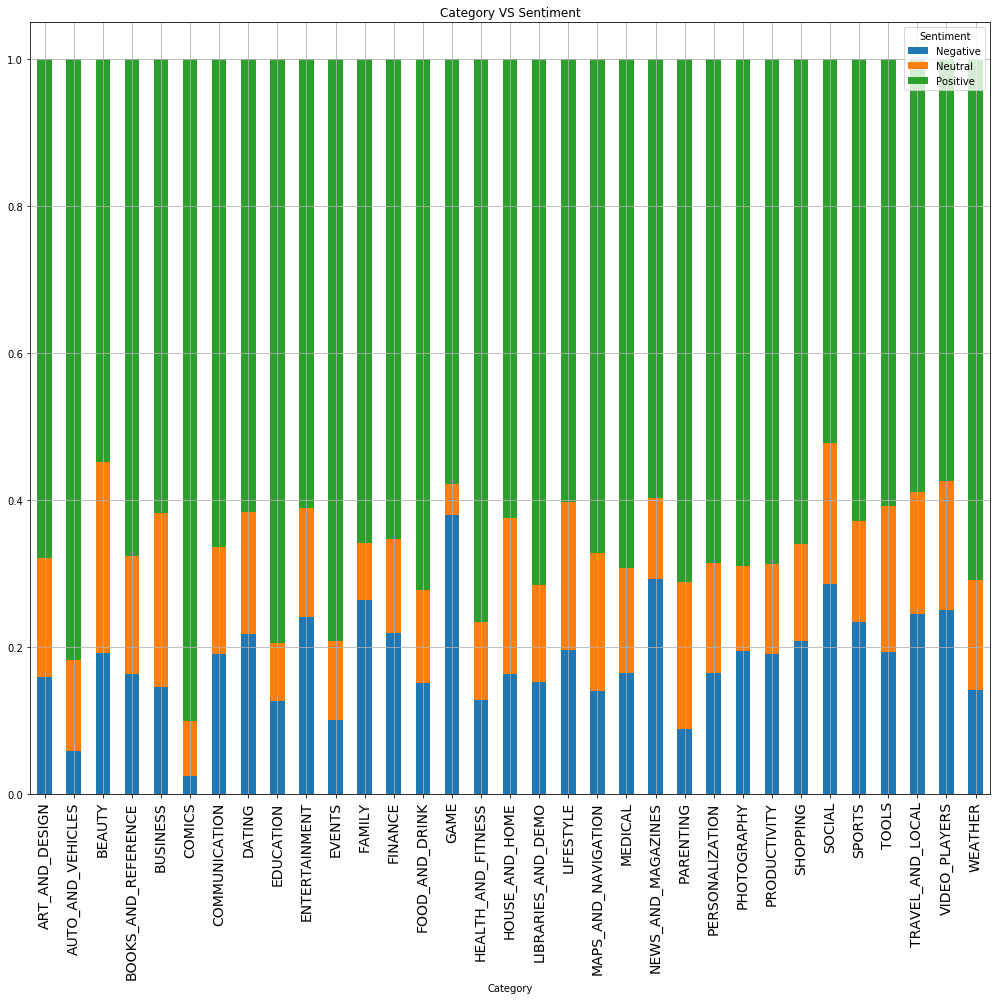

In [21]:
gdf = mdf.groupby(['Category', 'Sentiment']).count()
testdf = gdf['App'].unstack().T
testdf = testdf.div(testdf.sum())
p = testdf.T.plot(kind='bar', stacked=True, rot=1, figsize=(14, 14), 
               title='Category VS Sentiment')
fig = p.get_figure()
plt.grid(True)
plt.xticks(rotation=90, size=14)
plt.tight_layout()
plt.show()

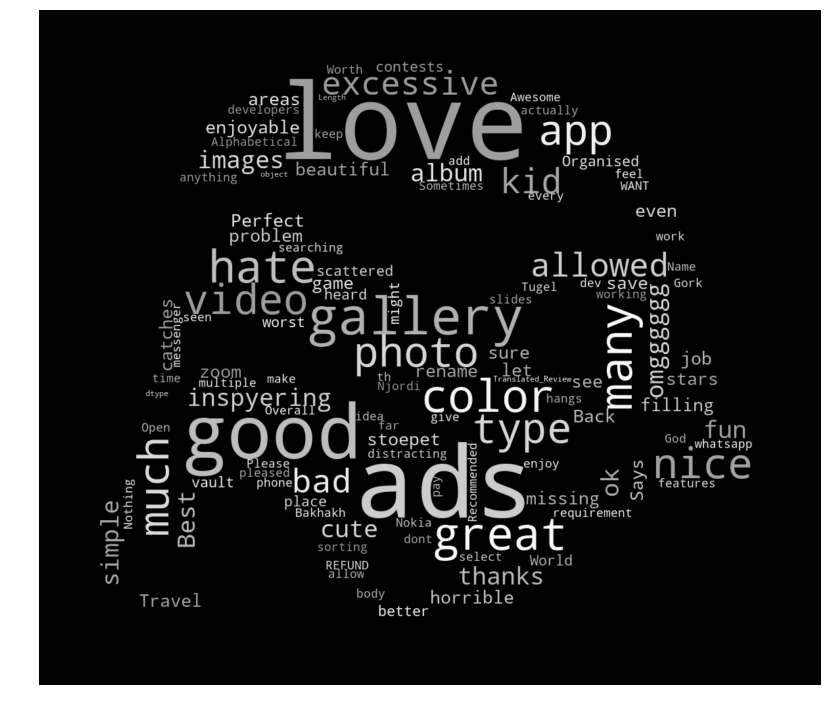

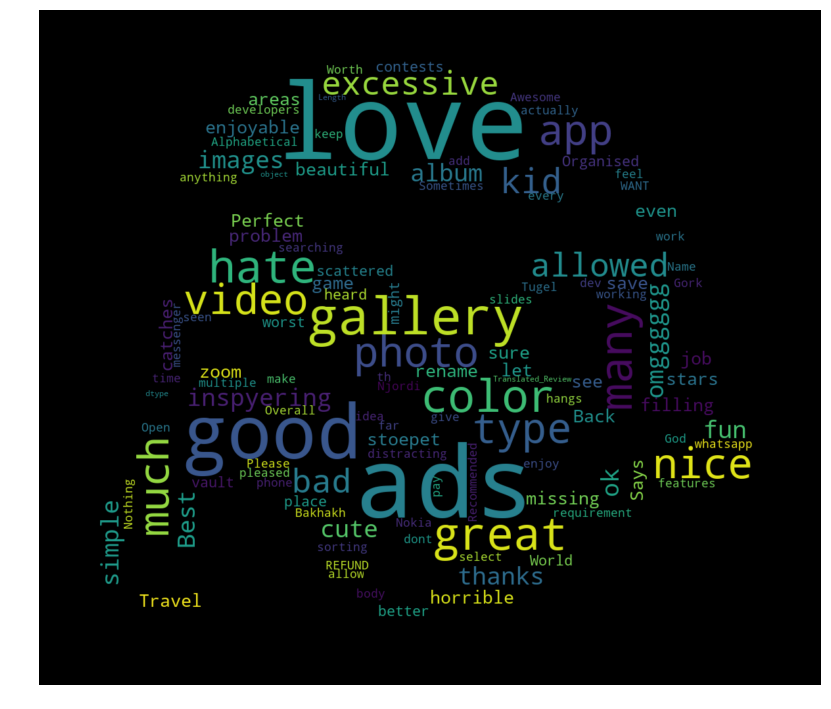

In [39]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.

mdf['Translated_Review'] = mdf['Translated_Review'].apply(lambda x: ' '.join(x for x in str(x).split(' '))) 

wc = WordCloud(max_words=10000, mask=mask, margin=1,
               random_state=1).generate(''.join(str(mdf['Translated_Review'])))
#wc = WordCloud.fit_words(wc, cnt) 
# store default colored image
default_colors = wc.to_array()
plt.figure(figsize=(14,14))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
fig = plt.figure(figsize=(14,14))
plt.imshow(default_colors, interpolation="bilinear")
wc.to_file("finally.png")
plt.axis("off")
plt.show()